## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Objective](#section2)
3. [Uploading the DataSet](#section3)
4. [Data Visualization](#section4)
5. [Applying Machine Learning Technique, XGBoost](#section5)
6. [Applying Machine Learning Technique, Linear Regression](#section6)
7. [Applying Machine Learning Technique, Decision Tree Regressor](#section7)



### 1. Problem Statement
"The dataset contains saleprice of different House wth variety of features

### 2. Objective
"To Predict the sale price of the house

In [536]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Uploading the Dataset

In [36]:
House_Data= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")

In [29]:
House_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
House_Data=House_Data.iloc[:,1:]
House_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
House_Data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [31]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [32]:
House_Data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [172]:
House_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Splitting the dataset in train and test

In [173]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
df = pd.DataFrame(House_Data)
train, test = train_test_split(df, test_size=0.3)


In [174]:
print(train.head())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1177  1178          50       RM          NaN     3950   Pave  Grvl      Reg   
1236  1237         160       RL         36.0     2628   Pave   NaN      Reg   
121    122          50       RM         50.0     6060   Pave   NaN      Reg   
564    565          60       RL          NaN    13346   Pave   NaN      IR1   
1047  1048          20       RL         57.0     9245   Pave   NaN      IR2   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1177         Bnk    AllPub    ...            0    NaN    NaN         NaN   
1236         Lvl    AllPub    ...            0    NaN    NaN         NaN   
121          Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
564          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1047         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
117

In [175]:
print(test.head())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
621    622          60       RL         90.0    10800   Pave   NaN      Reg   
612    613          60       RL          NaN    11885   Pave   NaN      Reg   
319    320          80       RL          NaN    14115   Pave   NaN      Reg   
168    169          60       RL         62.0     8244   Pave   NaN      IR1   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
621          Lvl    AllPub    ...            0    NaN   NaN         NaN   
612          Lvl    AllPub    ...            0    NaN   NaN         NaN   
319          Lvl    AllPub    ...            0    NaN   NaN         NaN   
168          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1453         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
621      

In [176]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (1022, 81)
Test data shape (438, 81)


In [177]:
# Find  out the missing value in it
missing_count = (train.isnull(). sum() / len(train)) * 100
# filter to find missing count
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

MasVnrType       0.391389
MasVnrArea       0.391389
BsmtQual         2.837573
BsmtCond         2.837573
BsmtFinType1     2.837573
BsmtFinType2     2.935421
BsmtExposure     2.935421
GarageCond       5.870841
GarageQual       5.870841
GarageFinish     5.870841
GarageType       5.870841
GarageYrBlt      5.870841
LotFrontage     18.493151
FireplaceQu     46.673190
Fence           80.821918
Alley           93.542074
MiscFeature     96.379648
PoolQC          99.510763
dtype: float64


In [178]:
# We need to handle the missing values

### Data Visualization

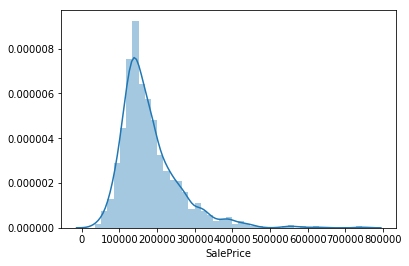

In [179]:
sns.distplot(train["SalePrice"])

##### We can see that data is not normally distributed, data is right skewed

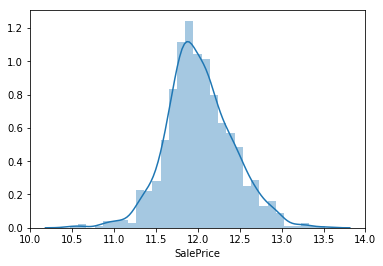

In [180]:
# Let's transform the Target (SalePrice) variable by log scale

target = np.log(train['SalePrice'])
sns.distplot(target)

In [198]:
# Finding numerical features

numeric_data = train.select_dtypes(include = [np.number])

# Finding categorical features

categorical_data = train.select_dtypes(exclude = [np.number])

# Let sprint how many numerical and categorical data features we have in the dataset
print('There are {0} numerical and {1} categorical features in the train dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 37 numerical and 44 categorical features in the train dataset


In [199]:
# remove id column from numeric_data
del numeric_data['Id']
numeric_data.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

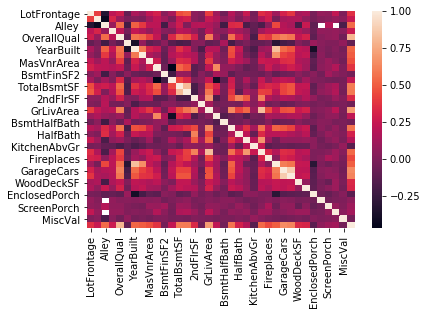

In [200]:
# correlation plot for numerical features
corr = numeric_data.corr()

sns.heatmap(corr)

In [201]:
# next we are going to do correlation for the categorical data.

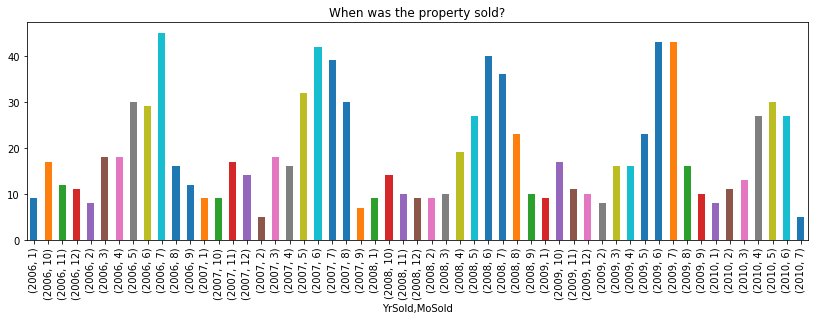

In [202]:
# When was the property sold in which year and month

train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title("When was the property sold?")
plt.show()

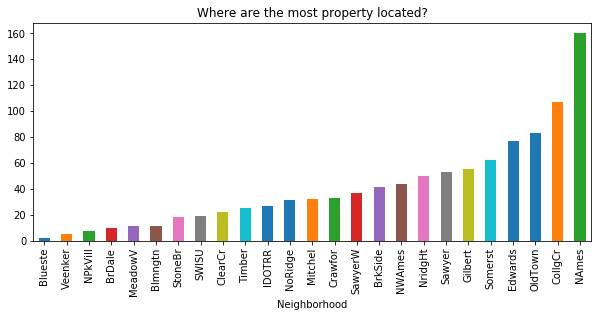

In [203]:
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='bar', figsize=(10,4))
plt.title("Where are the most property located?")
plt.show()

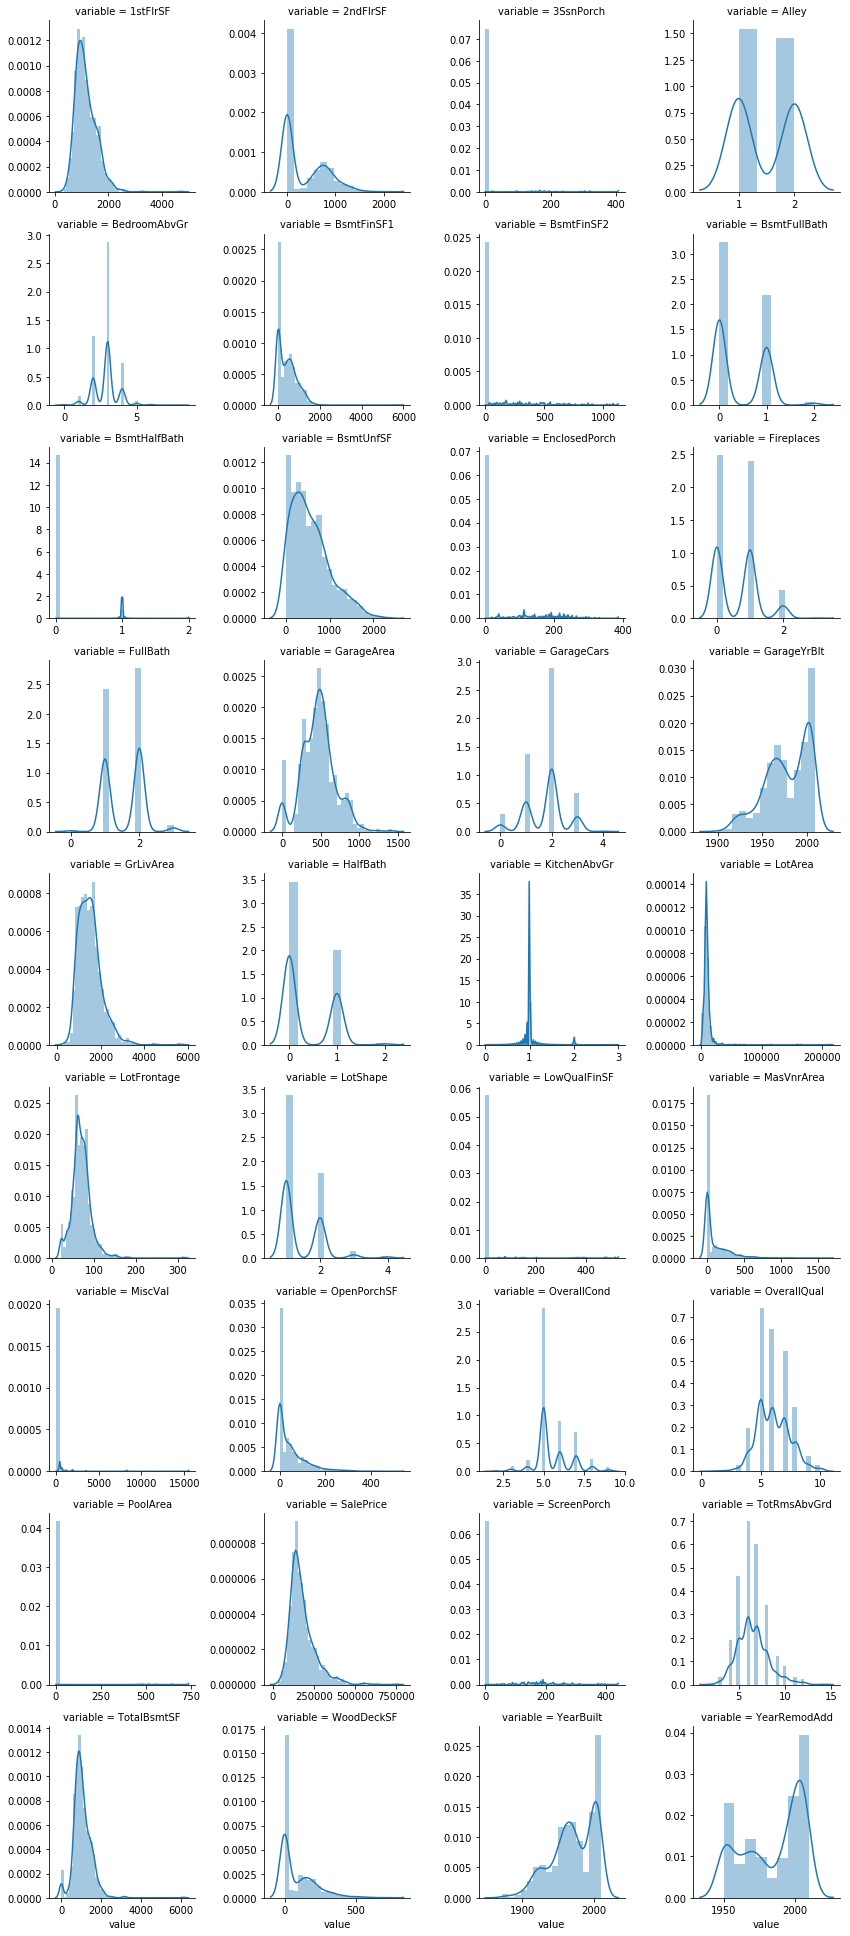

In [204]:
# Distribution of numerical features

f = pd.melt(train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [213]:
# Conversion from Numeric feature to categorical feature

train['MSSubClass'] = train.MSSubClass.apply(lambda x: str(x))
train['MoSold'] = train.MoSold.apply(lambda x: str(x))
train['YrSold'] = train.YrSold.apply(lambda x: str(x))


In [214]:
# Finding numerical features

numeric_data = train.select_dtypes(include = [np.number])

# Finding categorical features

categorical_data = train.select_dtypes(exclude = [np.number])

# Let sprint how many numerical and categorical data features we have in the dataset
print('There are {0} numerical and {1} categorical features in the train dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 37 numerical and 44 categorical features in the train dataset


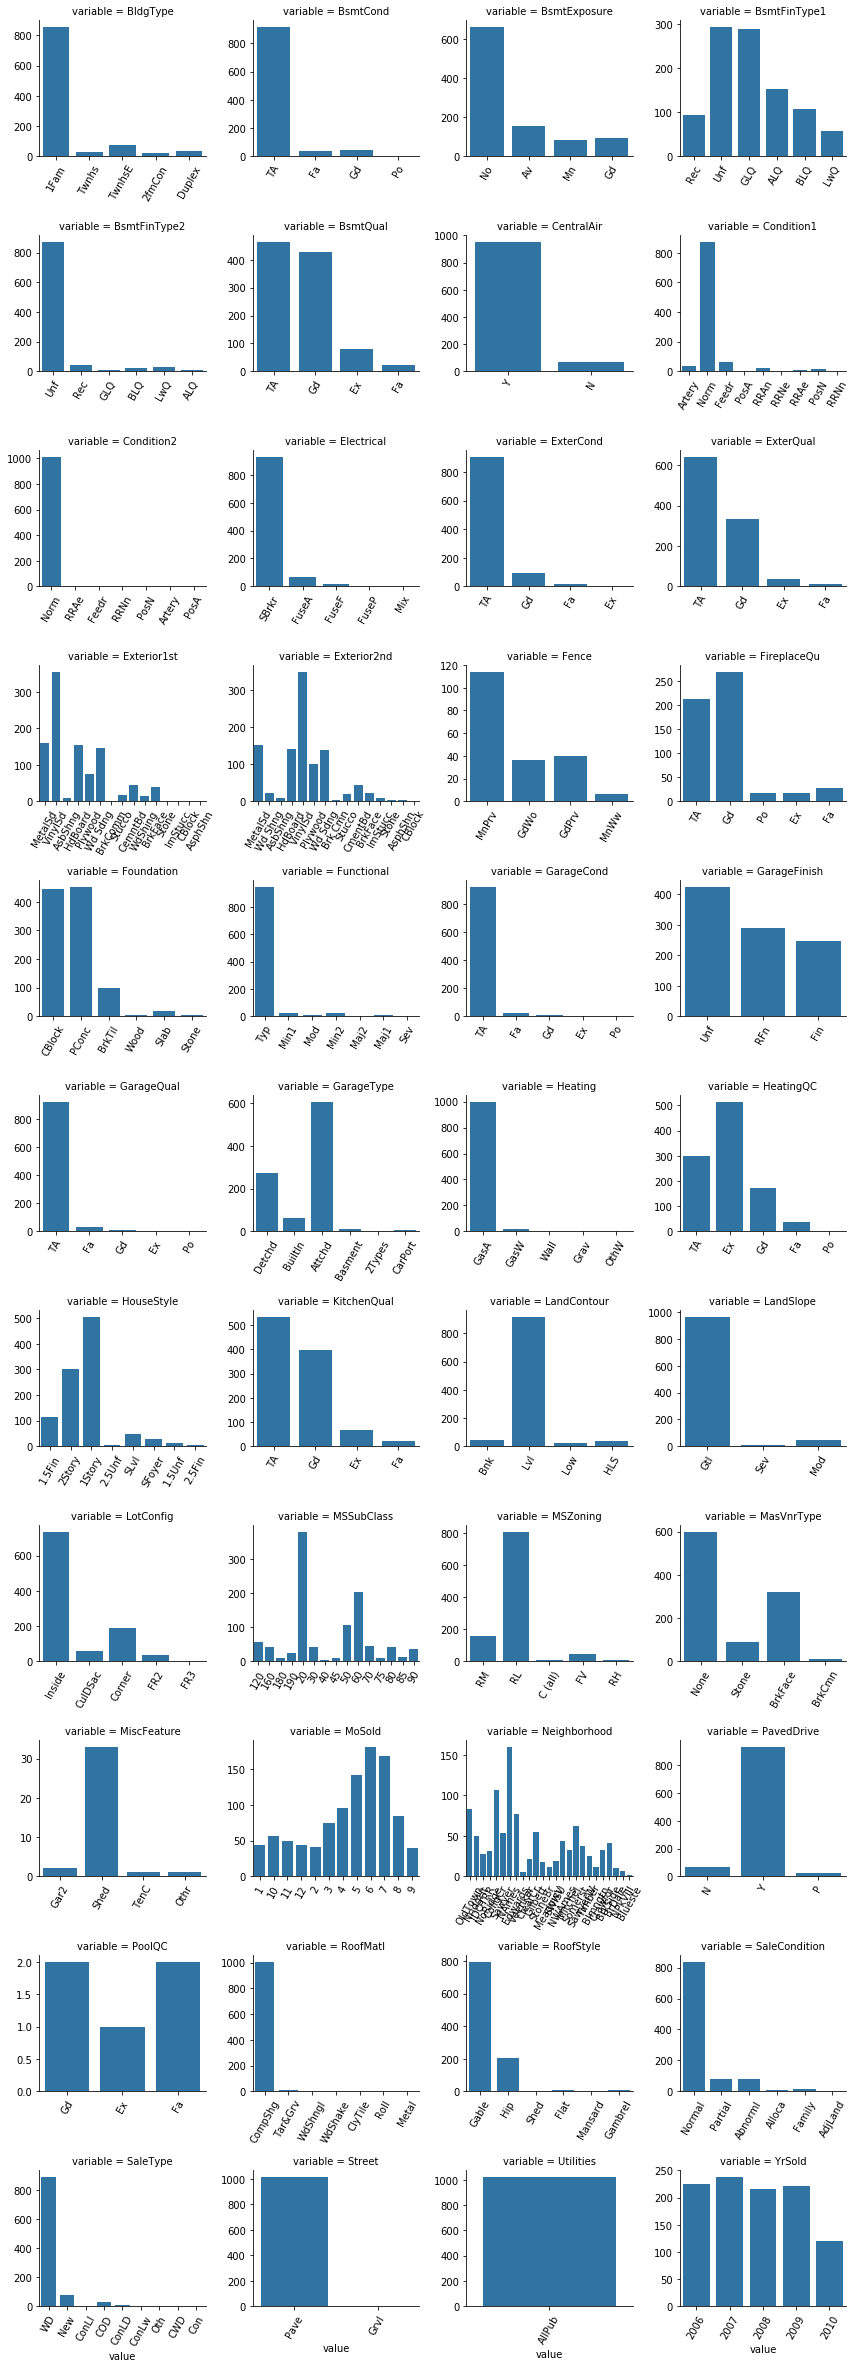

In [212]:
# lets plot count of categorical features

f = pd.melt(train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [220]:
cat_to_num = ['Alley', 'BldgType', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',\
             'FireplaceQu', 'GarageFinish', 'GarageQual', 'FireplaceQu', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC']

train[cat_to_num] = train[cat_to_num].fillna(0)

In [219]:
# Finding numerical features

numeric_data = train.select_dtypes(include = [np.number])

# Finding categorical features

categorical_data = train.select_dtypes(exclude = [np.number])

# Let sprint how many numerical and categorical data features we have in the dataset
print('There are {0} numerical and {1} categorical features in the train dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 37 numerical and 44 categorical features in the train dataset


In [210]:
train['Alley'].unique()

array([ 1., nan,  2.])

In [364]:
categorical_data.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [404]:
# Converting categorical data to numerical data so it will much easier when selecting features

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder


#train['MSSubClass']= preprocessing.LabelEncoder().fit_transform(train['MSSubClass'].values)
train['MSZoning']= preprocessing.LabelEncoder().fit_transform(train['MSZoning'].values)
train['Street']= preprocessing.LabelEncoder().fit_transform(train['Street'].values)
train['LotShape']= preprocessing.LabelEncoder().fit_transform(train['LotShape'].values)
#train['BldgType']= preprocessing.LabelEncoder().fit_transform(train['BldgType'].values)
train['LandContour']= preprocessing.LabelEncoder().fit_transform(train['LandContour'].values)
train['Utilities']= preprocessing.LabelEncoder().fit_transform(train['Utilities'].values)
train['LandSlope']= preprocessing.LabelEncoder().fit_transform(train['LandSlope'].values)
train['ExterQual']= preprocessing.LabelEncoder().fit_transform(train['ExterQual'].values)
train['ExterCond']= preprocessing.LabelEncoder().fit_transform(train['ExterCond'].values)
#train['BsmtQual']= preprocessing.LabelEncoder().fit_transform(train['BsmtQual'].values)
#train['BsmtCond']= preprocessing.LabelEncoder().fit_transform(train['BsmtCond'].values)
#train['BsmtExposure']= preprocessing.LabelEncoder().fit_transform(train['BsmtExposure'].values)
#train['BsmtFinType1']= preprocessing.LabelEncoder().fit_transform(train['BsmtFinType1'].values)
#train['BsmtFinType2']= preprocessing.LabelEncoder().fit_transform(train['BsmtFinType2'].values)
train['Heating']= preprocessing.LabelEncoder().fit_transform(train['Heating'].values)
train['KitchenQual']= preprocessing.LabelEncoder().fit_transform(train['KitchenQual'].values)
train['Functional']= preprocessing.LabelEncoder().fit_transform(train['Functional'].values)
#train['FireplaceQu']= preprocessing.LabelEncoder().fit_transform(train['FireplaceQu'].values)
#train['GarageFinish']= preprocessing.LabelEncoder().fit_transform(train['GarageFinish'].values)
#train['GarageQual']= preprocessing.LabelEncoder().fit_transform(train['GarageQual'].values)
#train['FireplaceQu']= preprocessing.LabelEncoder().fit_transform(train['FireplaceQu'].values)
#train['GarageFinish']= preprocessing.LabelEncoder().fit_transform(train['GarageFinish'].values)
#train['GarageQual']= preprocessing.LabelEncoder().fit_transform(train['GarageQual'].values)
#train['GarageCond']= preprocessing.LabelEncoder().fit_transform(train['GarageCond'].values)
train['PavedDrive']= preprocessing.LabelEncoder().fit_transform(train['PavedDrive'].values)
#train['PoolQC']= preprocessing.LabelEncoder().fit_transform(train['PoolQC'].values)
#train['MiscFeature']= preprocessing.LabelEncoder().fit_transform(train['MiscFeature'].values)







In [405]:
# Finding numerical features

numeric_data = train.select_dtypes(include = [np.number])

# Finding categorical features

categorical_data = train.select_dtypes(exclude = [np.number])

# Let sprint how many numerical and categorical data features we have in the dataset
print('There are {0} numerical and {1} categorical features in the train dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 51 numerical and 30 categorical features in the train dataset


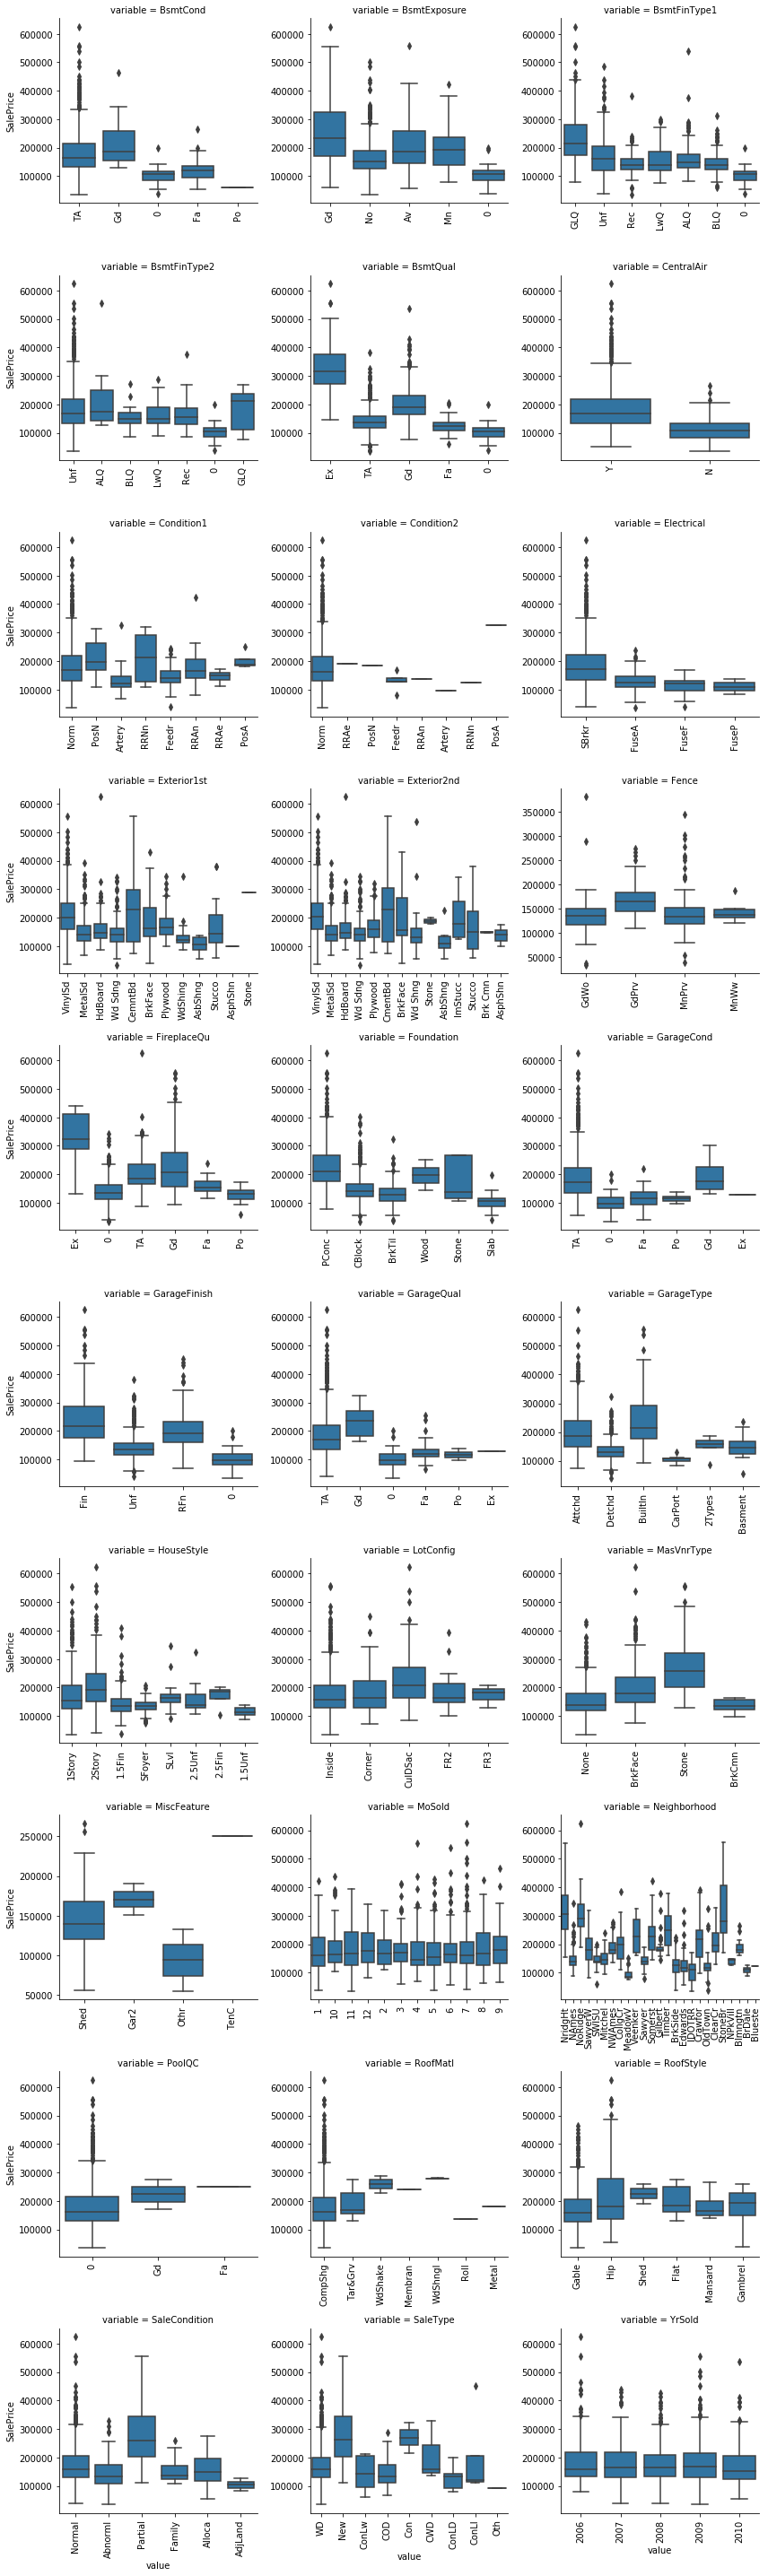

In [408]:
# Count plot of categorical features

f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size = 4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [427]:
import scipy.stats
cat_features = categorical_data.columns
train[cat_features] = train[cat_features].fillna('Missing')

anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in train[cat].unique():
        group_prices.append(train[train[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature', 'f', 'p']]
anova.sort_values('p', inplace=True)

In [428]:
anova

,feature,f,p
1,Neighborhood,55.045566,6.068323e-164
11,BsmtQual,236.841306,1.024591e-143
20,GarageFinish,172.860358,1.438724e-90
18,FireplaceQu,93.124743,8.966762e-81
10,Foundation,82.903754,4.408029e-73
19,GarageType,57.300131,4.253082e-61
9,MasVnrType,73.015092,2.029200e-54
14,BsmtFinType1,47.728550,1.062699e-51
29,SaleCondition,40.398233,5.854577e-38
28,SaleType,25.651684,2.852219e-36


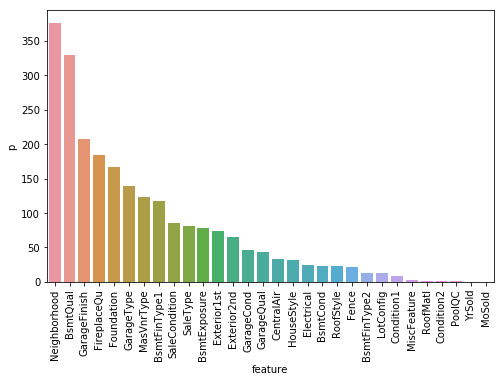

In [432]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Handling missing values

In [436]:
missing_values = (train[cat_features]== 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

train.loc[train.Electrical == 'Missing', 'Electrical']= train.Electrical.mode()[0]

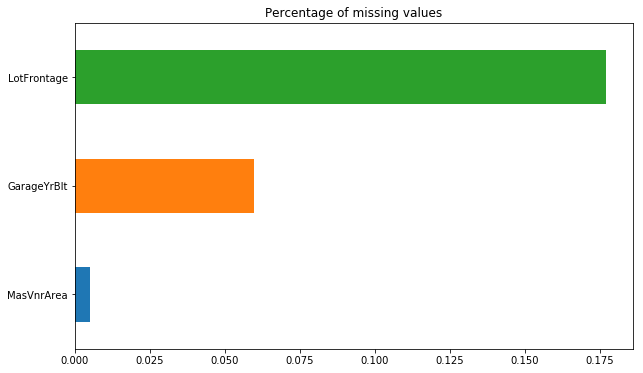

In [438]:
missing_data = train.isnull().sum() / train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [538]:
# Lot Frontage ( How can there be no street infront of the lot)Hence we replace it with median value

train.LotFrontage = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Garage Year built, if missing we can set it to zero

train.GarageYrBlt.fillna(0, inplace=True)

# Masonary Veeer Area, here most values are zero

train.MasVnrArea.fillna(0, inplace=True)

In [539]:
# First lets correct our assignment

#train.MasVnrType.replace({'Missing' : 'None'}, inplace = True)

# Second we are going to replace them with the mean value

#train.loc[(train.MasVnrType == 'None') &  (train.MasVnrType > 1), 'MasVnrType'] = 'BrkFace'   # most common
#train.loc[(train.MasVnrType == 'None') &  (train.MasVnrType == 1), 'MasVnrType'] = 0  # 1 sq ft ia basically 0
#for vnr_type in train.MasVnrType.unique():
    # here we are setting the area equal to the mean of the given veneer type
  #  train.loc[(train.MasVnrType == vnr_type) & (train.MasVnrType == 0),'MasVnrArea'] = \
  #  train[train.MasVnrType == vnr_type].MasVnrArea.mean()
    

In [448]:
mssing_data = train.isnull().sum() / train.shape[0]
missing_data

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177104
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.004892
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.000000
GarageType  

In [458]:
print('Train set duplicate IDs:{}'.format(train.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(test.duplicated('Id').sum()))

Train set duplicate IDs:0
Test set duplicate IDs: 0


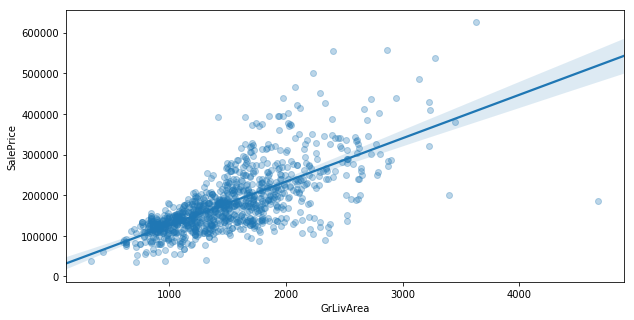

In [459]:
# Check for Outliers

plt.figure(figsize=(10,5))
sns.regplot(train.GrLivArea, train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [460]:
# Removing houses which has more than  4000 sq ft

train.drop(train[train.GrLivArea >= 4000].index, inplace=True)

In [461]:
# Calculating total square feet area

train['TotalSF'] = train.TotalBsmtSF + train.GrLivArea
train['TotalFloorSF'] = train['1stFlrSF'] + train['2ndFlrSF']
train['TotalPorchSF'] = train.OpenPorchSF + train.EnclosedPorch + train['3SsnPorch'] + train['ScreenPorch']

In [465]:
# Now Lets create some boolean features

train['HasBasement'] = train.TotalBsmtSF.apply(lambda x:1 if x > 0 else 0)
train['HasGarage'] = train.GarageArea.apply(lambda x:1 if x > 0 else 0)
train['HasPorch'] = train.TotalPorchSF.apply(lambda x:1 if x > 0 else 0)
train['HasPool'] = train.PoolArea.apply(lambda x:1 if x > 0 else 0)
train['WasRemodeled'] = (train.YearRemodAdd != train.YearBuilt).astype(np.int64)
train['IsNew']= (train.YearBuilt > 2000).astype(np.int64)
train['WasCompleted']= (train.SaleCondition != 'Partial').astype(np.int64)

In [472]:
boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodeled', 'IsNew', 'WasCompleted']

In [473]:
# Finding numerical features

numeric_data = train.select_dtypes(include = [np.number])

# Finding categorical features

categorical_data = train.select_dtypes(exclude = [np.number])

# Let sprint how many numerical and categorical data features we have in the dataset
print('There are {0} numerical and {1} categorical features in the train dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 62 numerical and 30 categorical features in the train dataset


In [475]:
num_features = numeric_data.columns
cat_features = categorical_data.columns

num_features = [f for f in num_features if f not in boolean_features]

In [476]:
 # Total Bathrooms
    
train['TotalBathrooms']= train.FullBath + .5 * train.HalfBath + train.BsmtFullBath + .5 * train.BsmtHalfBath

In [477]:
# Finding numerical features

numeric_data = train.select_dtypes(include = [np.number])

# Finding categorical features

categorical_data = train.select_dtypes(exclude = [np.number])

# Let sprint how many numerical and categorical data features we have in the dataset
print('There are {0} numerical and {1} categorical features in the train dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 63 numerical and 30 categorical features in the train dataset


In [478]:
features = num_features + ['SalePrice']
for f in features:
    train.loc[:,f] = np.log1p(train[f])

In [479]:
y = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)

# Get dummies one-hot encoding method

model_data = pd.get_dummies(train).copy()

In [481]:
model_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
309,1.609438,1.386294,4.510860,9.423757,0.693147,0.0,0.693147,1.386294,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
870,1.609438,1.386294,4.110874,8.794976,0.693147,0.0,0.000000,1.386294,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
226,2.302585,1.386294,4.418841,9.205428,0.693147,0.0,0.693147,1.386294,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1309,1.609438,1.386294,4.212128,8.875427,0.693147,0.0,0.000000,1.386294,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
130,2.302585,1.386294,4.488636,9.561068,0.693147,0.0,0.000000,1.386294,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [482]:
X_train, X_test, y_train, y_test = train_test_split(model_data.copy(), y, test_size = 0.3, random_state=42)
print('Shape')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)


Shape
X_train: (714, 272)
X_val: (307, 272)
y_train: (714,)
y_val: (307,)


In [484]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# Remove Id and SalePrice from num_features

num_features.remove('Id')
num_features.remove('SalePrice')

# Reason to make feature means at 0 with standard deviation of 1

stdsc = StandardScaler()
X_train.loc[:, num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:, num_features] = stdsc.transform(X_test[num_features])

In [485]:
from sklearn.model_selection import cross_val_score

def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)


In [488]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [5000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']


param_grid = {'alpha': [x/100. * alpha for x in range (50, 150, 5)], 'max_iter': [5000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha:{:.5f}'.format(rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00996 | Test RSME: 0.00936 | alpha:0.00050


###### We observe that RSME of the training and  Test data is pretty close to each which means we are overfitting

Lasso dropped 242 of 272 features.


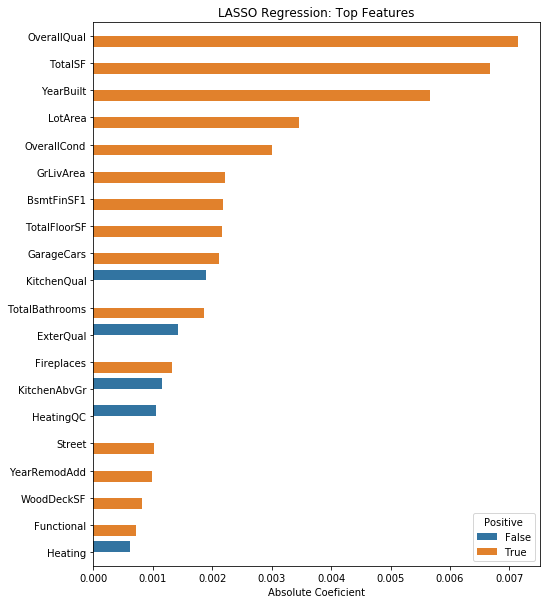

In [494]:
import seaborn as sns
coefs = pd.DataFrame({'coefs':lasso.coef_, 'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs']= np.abs(coefs.coefs)
print('Lasso dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize = (8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

##### Now let's apply machine learning XGBoost Library

In [497]:
import xgboost as xgb

regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0,learning_rate=0.05, max_depth=6,  min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1) 
                     
regr.fit(X_train[top_coefs.index], y_train)
                        
                        
                        

ModuleNotFoundError: No module named 'xgboost'

In [503]:
import xgboost as xgb

regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0,learning_rate=0.05, max_depth=6,  min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1) 
                     
regr.fit(X_train[top_coefs.index], y_train)
                        

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
       silent=1, subsample=0.2, verbosity=1)

In [504]:
from sklearn.metrics import mean_squared_error
def rmse(t_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

## Run prediction on training set to get an idea of how well it does

y_pred = regr.predict(X_test[top_coefs.index])

print("XGBoost score on training set:", rmse(y_test, y_pred))

XGBoost score on training set: 0.017316535687820395


In [514]:
y_pred

array([2.5793834, 2.5881293, 2.529633 , 2.5372157, 2.58455  , 2.5881293,
       2.5360436, 2.5580413, 2.5848618, 2.5429456, 2.5880146, 2.5685813,
       2.572596 , 2.5881293, 2.575037 , 2.520951 , 2.5339994, 2.570532 ,
       2.542106 , 2.5727398, 2.584366 , 2.541528 , 2.5440643, 2.56226  ,
       2.5593197, 2.5868802, 2.5778944, 2.5480225, 2.553    , 2.5563228,
       2.57694  , 2.553902 , 2.5601003, 2.577383 , 2.5633628, 2.5861697,
       2.5841362, 2.5778377, 2.5764205, 2.5757713, 2.5500321, 2.5878644,
       2.559123 , 2.5394619, 2.5792673, 2.5241156, 2.5868802, 2.5472083,
       2.5791392, 2.585267 , 2.529817 , 2.524449 , 2.5709124, 2.5443506,
       2.547577 , 2.567312 , 2.5877185, 2.572618 , 2.5880146, 2.548201 ,
       2.5589776, 2.5859635, 2.580696 , 2.546332 , 2.5874712, 2.5456274,
       2.570543 , 2.5417008, 2.5839474, 2.5697305, 2.5860188, 2.5328455,
       2.5721302, 2.5279274, 2.5881293, 2.549455 , 2.54839  , 2.5805492,
       2.5881293, 2.5653694, 2.5547366, 2.5528889, 

### Using Linear Regression

In [515]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [516]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [517]:
y_pred = linear.predict(X_test)

In [519]:
r2_score(y_test, y_pred)

0.6966856181448667

### Using Decision Tree Regressor

In [520]:
from sklearn.tree import DecisionTreeRegressor

In [521]:
regressor = DecisionTreeRegressor(max_depth=6, splitter = 'best', criterion= 'mse', min_samples_leaf=1, min_weight_fraction_leaf=0.0)


In [522]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [523]:
prediction = regressor.predict(X_test)

In [524]:
prediction

array([2.57193348, 2.62992159, 2.53839164, 2.5211367 , 2.61335706,
       2.60245375, 2.5211367 , 2.55189769, 2.58378011, 2.44605604,
       2.59935293, 2.57193348, 2.55992402, 2.62410266, 2.55992402,
       2.54820795, 2.54820795, 2.57193348, 2.53461226, 2.55992402,
       2.59935293, 2.55933026, 2.53839164, 2.5627563 , 2.55933026,
       2.58806328, 2.59282987, 2.55189769, 2.54820795, 2.50866742,
       2.57193348, 2.54820795, 2.54820795, 2.57193348, 2.55992402,
       2.57765582, 2.59530402, 2.57213329, 2.57213329, 2.59652766,
       2.55933026, 2.59935293, 2.5627563 , 2.57658493, 2.57765582,
       2.5211367 , 2.59935293, 2.55189769, 2.58378011, 2.61075629,
       2.51631447, 2.53566183, 2.55933026, 2.54820795, 2.55189769,
       2.5627563 , 2.58806328, 2.57193348, 2.61075629, 2.53839164,
       2.55189769, 2.58806328, 2.5627563 , 2.54820795, 2.58378011,
       2.51631447, 2.55933026, 2.5211367 , 2.57193348, 2.55933026,
       2.57765582, 2.53566183, 2.57193348, 2.53677863, 2.61075

In [525]:
from sklearn.metrics import mean_absolute_error

In [526]:
error = mean_absolute_error(y_test, prediction)
error

0.01242451612377732

## Accuracy of the Model

In [528]:
z= (error/y_test.mean())
print(100 - 100 * z)

99.51608265679032


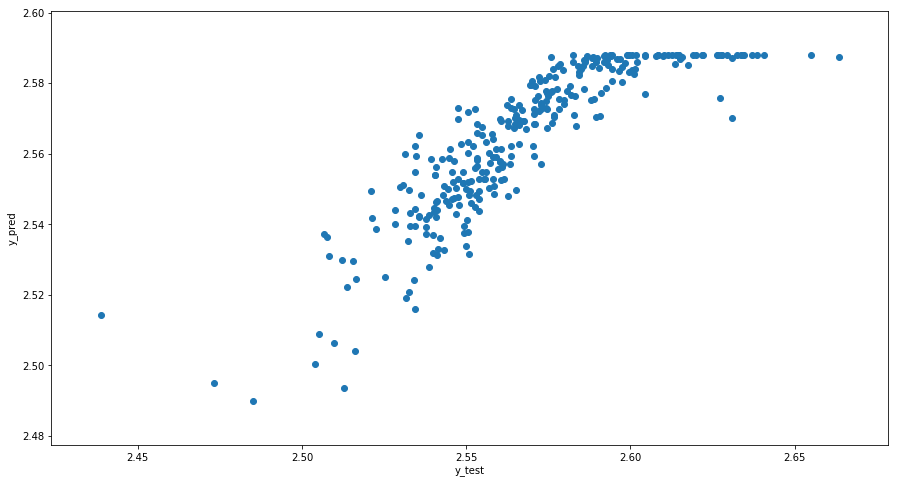

In [541]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()